In [1]:
import numpy as np
from atomdb import load
import matplotlib.pyplot as plt
#from atomdb import dens_func, d_dens_func, dd_dens_func, ked_func

relevant functions from AtomDB library: 

Task:
It would be good to code a little function that computes the electron localization function of Becke and Edgecombe too, which is just the difference of the kinetic energy with the Weizsacker kinetic energy (the Pauli kinetic energy) divided by the Thomas-Fermi kinetic energy. My old paper has some formulas nicely typeset. 

In [33]:
# Load Data From Server, Oxygen Atom in HCI function Basis
HCI = load(elem="Ne", charge=0, mult=1, dataset="gaussian")

# arbitrary grid on which quantites are evaluated
rad_grid = np.linspace(0.0, 6.0, 1000)

# splines of the quantites are generated
dens_spline = HCI.dens_func(spin="t")
d_dens_spline = HCI.d_dens_func(spin="t")
dd_dens_spline = HCI.dd_dens_func(spin="t")
ked_spline = HCI.ked_func(spin="t")

# quantities are projected onto grid
dens = dens_spline(rad_grid)
d_dens = d_dens_spline(rad_grid)
dd_dens = dd_dens_spline(rad_grid)
ked = ked_spline(rad_grid)


$\xi_{\sigma}(r) = \frac{\rho_{\sigma}(r) \kappa_{\sigma}^{BE}(r) [\rho_{\alpha}, \rho_{\alpha}]}{(2/3)\{(3/10)(6\pi^2)^{2/3} \rho_{\sigma}^{5/3}(r)\}}$\
$\rho(r) = $ dens\
$\kappa_{\sigma}^{BE}(r) [\rho_{\alpha}, \rho_{\alpha}]=  \frac{2}{3} \frac{\tau_{\sigma}(r) - \tau_{\sigma}^{W}(r)}{\rho_{\sigma}}$\
$\tau_{\sigma}=$ ked_func\
$\tau_{\sigma}^{W}(r)=\sum_{i=1}^{N_{\sigma}} \frac{\nabla \rho(r) \nabla \rho(r)}{8 \rho_{\sigma}(r)}$:

In [34]:
Weizaecker = d_dens*d_dens/(8.0*dens)
Becke_Edge = 2/3*(ked-Weizaecker)/(dens)
Elec_Local = (3/2*dens*Becke_Edge)/(3/10*(6*np.pi**2)**(2/3)*dens**(5/3))
L = np.tanh(Elec_Local**(-1)-Elec_Local)

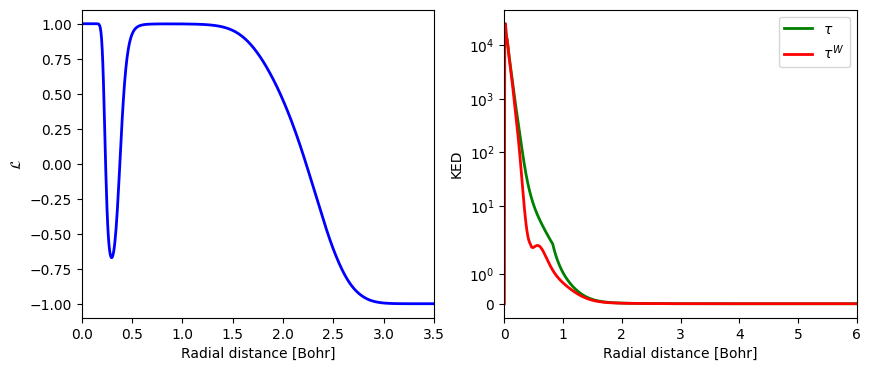

In [37]:
# plot Density and Kinetic Energy Density

fig = plt.figure(figsize=(10, 4))
ax1 = fig.add_subplot(121)
#ax2 = fig.add_subplot(122)

ax1.plot(rad_grid, L, "-b", linewidth=2)
ax1.set(xlabel="Radial distance [Bohr]", ylabel=r"$\mathcal{L}$ ")

#ax1.set_yscale("symlog")
#ax1.set_ylim(top=10, bottom=0.00001)
ax1.set_xlim(left=0.0, right=3.5)


ax2 = fig.add_subplot(122)

ax2.plot(rad_grid, ked, "-g", linewidth=2, label = r"$\tau$")
ax2.plot(rad_grid, Weizaecker, "-r", linewidth=2, label = r"$\tau^{W}$")
ax2.set(xlabel="Radial distance [Bohr]", ylabel="KED")
ax2.legend()
ax2.set_yscale("symlog")
ax2.set_xlim(left=0.0, right=6)

plt.show()

In [9]:
print(5/3)

1.6666666666666667
